# Approaches to Linear Regression using Machine Learning #
<br>
Problem statement:
<br>
Predict the income of an individual based on race, gender, employement type and hours worked.
<br>
Considering the problem statment requires us to predict the value of the monthly income, we apply a Linear Regression Model.

In [2]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 812.7 kB/s eta 0:00:13
    --------------------------------------- 0.2/9.8 MB 1.4 MB/s eta 0:00:07
   - -------------------------------------- 0.3/9.8 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.4/9.8 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.8 MB 2.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/9.8 MB 2.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/9.8 MB 2.7 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/9.8 MB 2.7 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/9.8 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/9.8 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/9.8 MB 2.8 MB/s eta 0:00:04
   ---- ----------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [36]:
IncomeData = pd.read_csv(r"C:\Users\User\Python Projects\ML Projects\Assignment 3\income_data.csv")

In [37]:
IncomeData.head()

,Race,Gender,Employee type,Hours worked,Monthly income
0,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,40.0,2820.29
1,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,41.0,3250.72
2,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,40.0,4625.00
3,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,30.0,6000.00
4,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,10.0,2666.67


In [38]:
updated_col_names = {'Employee type': 'EmployeeType',
                     'Hours worked': 'HoursWorked',
                     'Monthly income': 'MonthlyIncome'}

IncomeData = IncomeData.rename(columns = updated_col_names)

In [39]:
IncomeData['EmployeeType'].value_counts()

EmployeeType
CRF - CLASSIFIED REGULAR FULL-TIME          131402
URF - UNCLASSIFIED REGULAR FULL-TIME          3292
CRP - CLASSIFIED REGULAR PART-TIME            1754
URP - UNCLASSIFIED REGULAR PART-TIME           982
ERF - EXEMPT REGULAR FULL-TIME                 936
CTF - CLASSIFIED TEMPORARY FULL-TIME           328
CTP - CLASSIFIED TEMPORARY PART-TIME           135
UTP - UNCLASSIFIED TEMPORARY PART-TIME          24
UTF - UNCLASSIFIED TEMPORARY FULL-TIME          20
Name: count, dtype: int64

In [40]:
# Shortening categorical sting values for Employee Type
IncomeData['EmployeeType'] = IncomeData['EmployeeType'].str[:3]  

In [41]:
IncomeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138873 entries, 0 to 138872
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Race           138873 non-null  object 
 1   Gender         138873 non-null  object 
 2   EmployeeType   138873 non-null  object 
 3   HoursWorked    138873 non-null  float64
 4   MonthlyIncome  138873 non-null  float64
dtypes: float64(2), object(3)
memory usage: 5.3+ MB


### Preparing the data ###
We observe that the dataset contains five features. The MonthlyIncome column represents the target feature and the remaining four viz. Race, Gender, EmployeeType, and HoursWorked are the independent variable.
<br>
<br>
As Race, Gender, and EmployeeType are categorical variables of nominal type, they must be replaced by categorical codes.

**One Hot Encoding on Race, Gender and EmployeeType**

In [42]:
# Importing necessary library
from sklearn.preprocessing import OneHotEncoder

In [43]:
#Setting up One Hot Encoder's functionality
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')

In [44]:
#Encoding on Race column
Race_ohe = ohe.fit_transform(IncomeData[['Race']])

In [45]:
#Encoding on Gender column
Gender_ohe = ohe.fit_transform(IncomeData[['Gender']])

In [46]:
#Encoding on EmployeeType column
EmployeeType_ohe = ohe.fit_transform(IncomeData[['EmployeeType']])

In [47]:
#Concating the new columns to the original IncomeData dataframe and dropping the string columns
IncomeData = pd.concat([IncomeData, Race_ohe], axis = 1).drop(columns = ['Race'])

In [48]:
IncomeData = pd.concat([IncomeData, Gender_ohe], axis = 1).drop(columns = ['Gender'])

In [49]:
IncomeData = pd.concat([IncomeData, EmployeeType_ohe], axis = 1).drop(columns = ['EmployeeType'])

In [50]:
IncomeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138873 entries, 0 to 138872
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   HoursWorked             138873 non-null  float64
 1   MonthlyIncome           138873 non-null  float64
 2   Race_AM INDIAN          138873 non-null  float64
 3   Race_ASIAN              138873 non-null  float64
 4   Race_BLACK              138873 non-null  float64
 5   Race_HISPANIC           138873 non-null  float64
 6   Race_OTHER              138873 non-null  float64
 7   Race_WHITE              138873 non-null  float64
 8   Gender_FEMALE           138873 non-null  float64
 9   Gender_MALE             138873 non-null  float64
 10  EmployeeType_CRF        138873 non-null  float64
 11  EmployeeType_CRP        138873 non-null  float64
 12  EmployeeType_CTF        138873 non-null  float64
 13  EmployeeType_CTP        138873 non-null  float64
 14  EmployeeType_ERF    

In [51]:
IncomeData.head(10)

,HoursWorked,MonthlyIncome,Race_AM INDIAN,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_OTHER,Race_WHITE,Gender_FEMALE,Gender_MALE,EmployeeType_CRF,EmployeeType_CRP,EmployeeType_CTF,EmployeeType_CTP,EmployeeType_ERF,EmployeeType_URF,EmployeeType_URP,EmployeeType_UTF,EmployeeType_UTP
0,40.0,2820.29,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41.0,3250.72,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,40.0,4625.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,6000.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10.0,2666.67,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,20.0,1785.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,20.0,1591.06,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,40.0,3071.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,40.0,10526.09,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,30.0,5000.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Closed Form Linear Regression Approach - Ordinary Least Squares Method ###

**Vectorising the independent and dependent variables**

In [52]:
y = IncomeData['MonthlyIncome']
X = IncomeData.drop('MonthlyIncome', axis = 1)

**Splitting the data into train and test**

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

**Training the model**

In [54]:
#Importing necessary library
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [55]:
#Fitting the model to the data
linear_reg.fit(X_train, y_train)

LinearRegression()

In [56]:
linear_pred_test = linear_reg.predict(X_test)
linear_pred_train = linear_reg.predict(X_train)

In [57]:
#Computing the Mean Squared Error for OLS
test_error_ols = mean_squared_error(y_test, linear_pred_test)
train_error_ols = mean_squared_error(y_train, linear_pred_train)

print("Train MSE: ", train_error_ols)
print("Test MSE: ", test_error_ols)

score_ols = linear_reg.score(X_train, y_train)
print("R-squared (OLS):", score_ols)

Train MSE:  3962708.3796955384
Test MSE:  4136459.806632072
R-squared (OLS): 0.2010275443517896


### Linear Regression Using Stochastic Gradient ###

**Vectorising the independent and dependent variables**

In [58]:
y = IncomeData['MonthlyIncome']
X = IncomeData.drop('MonthlyIncome', axis = 1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [60]:
SGD = SGDRegressor(penalty="l2")

parameters = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
reg = GridSearchCV(estimator = SGD, param_grid = parameters, cv = 2, verbose = 3)

reg.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV 1/2] END alpha=0.1, learning_rate=constant, loss=squared_loss;, score=nan total time=   0.0s
[CV 2/2] END alpha=0.1, learning_rate=constant, loss=squared_loss;, score=nan total time=   0.0s
[CV 1/2] END alpha=0.1, learning_rate=constant, loss=huber;, score=-0.075 total time=   1.3s
[CV 2/2] END alpha=0.1, learning_rate=constant, loss=huber;, score=-0.054 total time=   1.2s
[CV 1/2] END alpha=0.1, learning_rate=optimal, loss=squared_loss;, score=nan total time=   0.0s
[CV 2/2] END alpha=0.1, learning_rate=optimal, loss=squared_loss;, score=nan total time=   0.0s
[CV 1/2] END alpha=0.1, learning_rate=optimal, loss=huber;, score=-1.968 total time=   0.7s
[CV 2/2] END alpha=0.1, learning_rate=optimal, loss=huber;, score=-1.938 total time=   0.6s
[CV 1/2] END alpha=0.1, learning_rate=invscaling, loss=squared_loss;, score=nan total time=   0.0s
[CV 2/2] END alpha=0.1, learning_rate=invscaling, loss=squared_loss;, score=nan tota

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/2] END alpha=0.1, learning_rate=invscaling, loss=huber;, score=-1.184 total time=   6.2s


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/2] END alpha=0.1, learning_rate=invscaling, loss=huber;, score=-1.156 total time=   6.1s
[CV 1/2] END alpha=0.01, learning_rate=constant, loss=squared_loss;, score=nan total time=   0.0s
[CV 2/2] END alpha=0.01, learning_rate=constant, loss=squared_loss;, score=nan total time=   0.0s
[CV 1/2] END alpha=0.01, learning_rate=constant, loss=huber;, score=-0.126 total time=   0.6s
[CV 2/2] END alpha=0.01, learning_rate=constant, loss=huber;, score=-0.126 total time=   0.2s
[CV 1/2] END alpha=0.01, learning_rate=optimal, loss=squared_loss;, score=nan total time=   0.0s
[CV 2/2] END alpha=0.01, learning_rate=optimal, loss=squared_loss;, score=nan total time=   0.0s
[CV 1/2] END alpha=0.01, learning_rate=optimal, loss=huber;, score=-0.159 total time=   0.0s
[CV 2/2] END alpha=0.01, learning_rate=optimal, loss=huber;, score=-0.153 total time=   0.0s
[CV 1/2] END alpha=0.01, learning_rate=invscaling, loss=squared_loss;, score=nan total time=   0.0s
[CV 2/2] END alpha=0.01, learning_rate=in

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", l

GridSearchCV(cv=2, estimator=SGDRegressor(),
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber']},
             verbose=3)

In [61]:
reg.best_params_

{'alpha': np.float64(1e-06), 'learning_rate': 'optimal', 'loss': 'huber'}

In [62]:
sgd_reg = make_pipeline(StandardScaler(), SGDRegressor(alpha=1e-06, eta0=0.001, fit_intercept=True,
       learning_rate='optimal', loss='huber',
       penalty='l2', power_t=0.25, shuffle=False,
       verbose=0))
sgd_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor',
                 SGDRegressor(alpha=1e-06, eta0=0.001, learning_rate='optimal',
                              loss='huber', shuffle=False))])

In [63]:
sgd_pred_test = sgd_reg.predict(X_test)
sgd_pred_train = sgd_reg.predict(X_train)

In [64]:
test_error_sgd = mean_squared_error(y_test, sgd_pred_test)
train_error_sgd = mean_squared_error(y_train, sgd_pred_train)

print("Train MSE: ", train_error_sgd)
print("Test MSE: ", test_error_sgd)

score_sgd = sgd_reg.score(X_train, y_train)
print("R-squared (SGD):", score_sgd)

Train MSE:  4213468.247844366
Test MSE:  4384611.167558241
R-squared (SGD): 0.15046863149828216


### Linear Regression Using Ridge, Lasso and Elastic Net ###

In [65]:
y = IncomeData['MonthlyIncome']
X = IncomeData.drop('MonthlyIncome', axis = 1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [67]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.01, max_iter=1000, tol=0.1, solver= "auto", random_state=1)
ridge_reg.fit(X_train, y_train)

ridge_pred_test = ridge_reg.predict(X_test)
ridge_pred_train = ridge_reg.predict(X_train)

In [68]:
test_error_ridge = mean_squared_error(y_test, ridge_pred_test)
train_error_ridge = mean_squared_error(y_train, ridge_pred_train)

print("Train MSE: ", train_error_ridge)
print("Test MSE: ", test_error_ridge)

score_ridge = ridge_reg.score(X_train, y_train)
print("R-squared:", score_ridge)

Train MSE:  3962695.1451566187
Test MSE:  4136467.454534182
R-squared: 0.2010302127369057


In [70]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.001, max_iter=10000, tol=0.1, random_state=1)
lasso_reg.fit(X_train, y_train)

lasso_pred_test = lasso_reg.predict(X_test)
lasso_pred_train = lasso_reg.predict(X_train)

In [71]:
test_error_lasso = mean_squared_error(y_test, lasso_pred_test)
train_error_lasso = mean_squared_error(y_train, lasso_pred_train)

print("Train MSE: ", train_error_lasso)
print("Test MSE: ", test_error_lasso)

score_lasso = lasso_reg.score(X_train, y_train)
print("R-squared:", score_lasso)

Train MSE:  3962695.1634411234
Test MSE:  4136469.6329104705
R-squared: 0.2010302090503322


In [72]:
from sklearn.linear_model import ElasticNet

elasticNet_reg = ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=1000, tol=0.1, random_state=1)
elasticNet_reg.fit(X_train, y_train)

elasticNet_pred_test = elasticNet_reg.predict(X_test)
elasticNet_pred_train = elasticNet_reg.predict(X_train)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.666e+11, tolerance: 5.510e+10
  model = cd_fast.enet_coordinate_descent(


In [73]:
test_error_enet = mean_squared_error(y_test, elasticNet_pred_test)
train_error_enet = mean_squared_error(y_train, elasticNet_pred_train)

print("Train MSE: ", train_error_enet)
print("Test MSE: ", test_error_enet)

score_enet = elasticNet_reg.score(X_train, y_train)
print("R-squared:", score_enet)

Train MSE:  3965053.9615386757
Test MSE:  4138766.846162906
R-squared: 0.2005546215157974


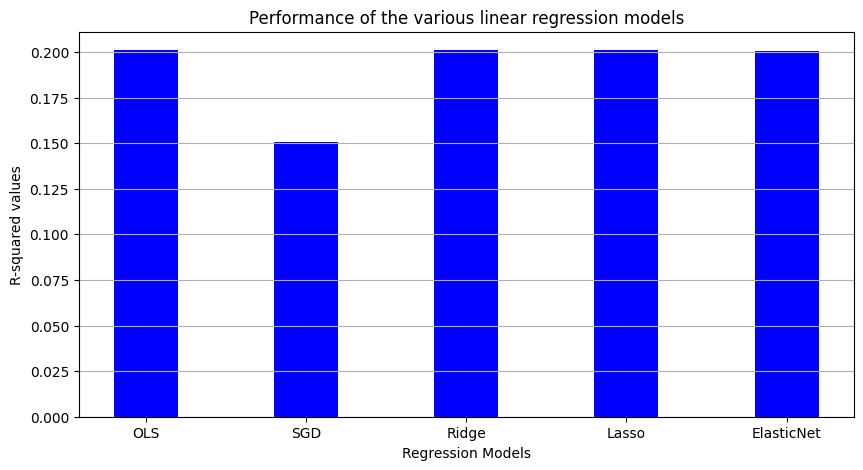

In [74]:
# creating the dataset
data = {'OLS':score_ols, 'SGD':score_sgd, 'Ridge':score_ridge, 'Lasso':score_lasso, 'ElasticNet':score_enet}

models = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

plt.grid(axis='y')

# creating the bar plot
plt.bar(models, values, color ='blue', width = 0.4)

plt.xlabel("Regression Models")
plt.ylabel("R-squared values")
plt.title("Performance of the various linear regression models")
plt.show()